In [1]:
import time

start = time.time()

In [2]:
import pandas as pd

data = pd.read_csv("/Users/lexi/Documents/QUT/S3/IFN701/data/UK_accidents-traffic-flow/accidents_2005_to_2007.csv")
data2 = pd.read_csv("/Users/lexi/Documents/QUT/S3/IFN701/data/UK_accidents-traffic-flow/accidents_2009_to_2011.csv")
data3 = pd.read_csv("/Users/lexi/Documents/QUT/S3/IFN701/data/UK_accidents-traffic-flow/accidents_2012_to_2014.csv")
print(data.info())

/Users/lexi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
Accident_Index                                 570011 non-null object
Location_Easting_OSGR                          569910 non-null float64
Location_Northing_OSGR                         569910 non-null float64
Longitude                                      569910 non-null float64
Latitude                                       569910 non-null float64
Police_Force                                   570011 non-null int64
Accident_Severity                              570011 non-null int64
Number_of_Vehicles                             570011 non-null int64
Number_of_Casualties                           570011 non-null int64
Date                                           570011 non-null object
Day_of_Week                                    570011 non-null int64
Time                                           569944 non-null object
Local_Authority_(District)                     570

In [3]:
import pandas as pd
data = pd.concat([
    data,data2,data3
],ignore_index=True)

In [4]:
df_clustering = data[["Accident_Severity", "Day_of_Week","Road_Type","Speed_limit","Weather_Conditions",\
          "Road_Surface_Conditions","Number_of_Vehicles","Number_of_Casualties"]]

In [5]:
df_clustering['Road_Type'] = df_clustering['Road_Type'].replace('Single carriageway', '0')
df_clustering['Road_Type'] = df_clustering['Road_Type'].replace('Dual carriageway', '1')
df_clustering['Road_Type'] = df_clustering['Road_Type'].replace('Roundabout', '2')
df_clustering['Road_Type'] = df_clustering['Road_Type'].replace('One way street', '3')
df_clustering['Road_Type'] = df_clustering['Road_Type'].replace('Slip road', '4')
df_clustering['Road_Type'] = df_clustering['Road_Type'].replace('Unknown', '5')

df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Fine without high winds', '0')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Raining without high winds', '1')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Other', '2')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Unknown', '3')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Raining with high winds', '4')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Fine with high winds', '5')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Snowing without high winds', '6')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Fog or mist', '7')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace('Snowing with high winds', '8')
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].replace(' ', '0')

df_clustering['Road_Surface_Conditions'] = df_clustering['Road_Surface_Conditions'].replace('Dry', '0')
df_clustering['Road_Surface_Conditions'] = df_clustering['Road_Surface_Conditions'].replace('Wet/Damp', '1')
df_clustering['Road_Surface_Conditions'] = df_clustering['Road_Surface_Conditions'].replace('Frost/Ice', '2')
df_clustering['Road_Surface_Conditions'] = df_clustering['Road_Surface_Conditions'].replace('Snow', '3')
df_clustering['Road_Surface_Conditions'] = df_clustering['Road_Surface_Conditions'].replace('Flood (Over 3cm of water)', '4')
df_clustering['Road_Surface_Conditions'] = df_clustering['Road_Surface_Conditions'].replace(' ', '0')

/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [6]:
from decimal import Decimal
df_clustering['Road_Type'] = df_clustering['Road_Type'].astype(float)
df_clustering['Weather_Conditions'] = df_clustering['Weather_Conditions'].astype(float)
df_clustering['Road_Surface_Conditions'] = df_clustering['Road_Surface_Conditions'].astype(float)
df_clustering['Accident_Severity'] = df_clustering['Accident_Severity'].astype(float)
df_clustering['Day_of_Week'] = df_clustering['Day_of_Week'].astype(float)
df_clustering['Speed_limit'] = df_clustering['Speed_limit'].astype(float)

/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lexi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [7]:
df_clustering = df_clustering.dropna()

In [8]:
# Standardized ?
from sklearn.preprocessing import StandardScaler
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(df_clustering)

/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lexi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
# list to save the clusters and cost
clusters = []
inertia_vals = []
rs = 42
# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

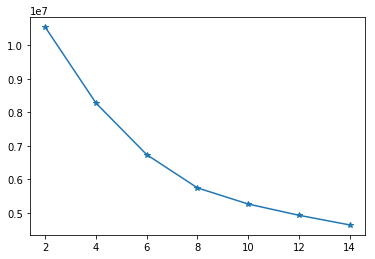

In [10]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print(clusters[0])
print("Silhouette score for k=2", silhouette_score(X, clusters[0].predict(X)))

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

print(clusters[4])
print("Silhouette score for k=10", silhouette_score(X, clusters[4].predict(X)))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=2, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df_clustering['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df_clustering['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_clustering, hue='Cluster_ID', height = 5)

plt.show()

Sum of intra-cluster distance: 10490223.48842143
Centroid locations:
[ 0.01520444 -0.00450475 -0.0047331   0.15613513  0.71552734  1.21912123
 -0.03467615  0.04675855]
[-0.00762486  0.00225908  0.0023736  -0.07830004 -0.35882904 -0.6113758
  0.0173897  -0.0234489 ]
Cluster membership
1    1000391
0     501679
Name: Cluster_ID, dtype: int64


/Users/lexi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lexi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [11]:
end = time.time() 
elapsed = end - start
print("Time taken: ", elapsed, "seconds.")

Time taken:  188.50761771202087 seconds.
